# 📊 ¿Quién se suicida en Chile?  
## Un análisis regional, etario y por sexo con datos reales (DEIS 2020)


El siguiente estudio explora los egresos hospitalarios por causas asociadas al suicidio en Chile durante el año 2020, usando datos abiertos del Ministerio de Salud (DEIS). El análisis busca identificar patrones según el sexo, edad y región, entregando una mirada estructural a un problema muchas veces invisibilizado.

Se utilizaron herramientas como PostgreSQL para filtrar y cruzar datos, y Google Colab para su visualización con Python.


>  **Nota técnica:** En este análisis, se utiliza la base de *egresos hospitalarios*, que incluye a todas las personas que fueron dadas de alta, trasladadas o fallecieron tras una hospitalización.  
> Los egresos asociados al suicidio corresponden a diagnósticos de lesiones autoinfligidas intencionalmente (códigos X60–X84 según CIE-10), por lo que **reflejan intentos de suicidio** que llegaron al sistema de salud, **no necesariamente suicidios consumados**.


**Fuentes:**
- Dataset principal: [EGRE_DATOS_ABIERTOS_2020.csv](https://deis.minsal.cl/)
- Diccionario de variables: Diccionario BD egresos hospitalarios

**Herramientas:**
- PostgreSQL para filtrado de datos
- Google Colab (Python, Pandas, Seaborn, Matplotlib)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes visuales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar los datasets
sexo = pd.read_csv("suicidios_por_sexo.csv")
edad = pd.read_csv("suicidios_por_edad.csv")
region = pd.read_csv("suicidios_por_region.csv")
cruzado = pd.read_csv("suicidios_cruzados.csv")


## Suicidios por sexo

En el gráfico se observa que las **mujeres presentan más egresos hospitalarios** por causas relacionadas con intentos de suicidio que los hombres. Esto puede deberse a que, aunque los hombres tienden a usar métodos más letales, las mujeres realizan más intentos, lo que genera una mayor cantidad de hospitalizaciones.

Este dato es importante al diseñar políticas públicas, ya que apunta a la necesidad de enfoques diferenciados en salud mental según el género.



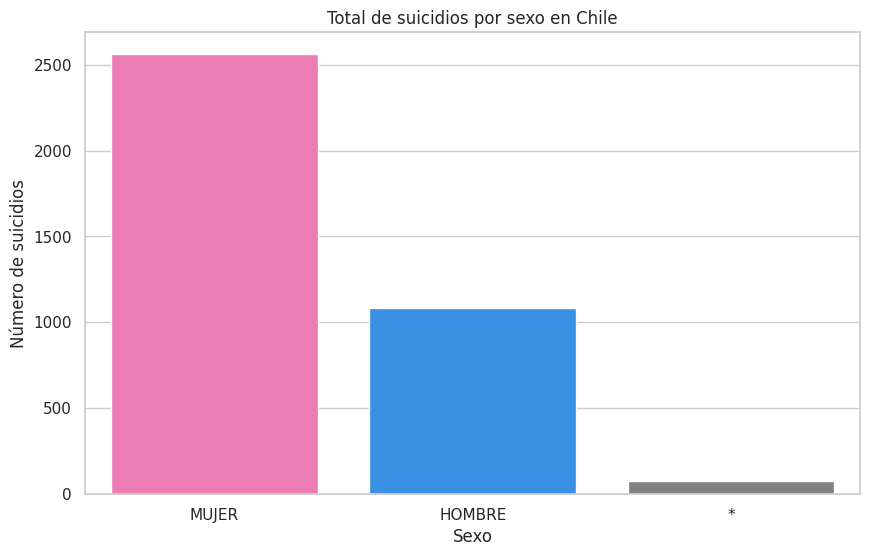

In [15]:
# 1. Definir la paleta personalizada según los valores en la columna "sexo"
colores = {
    'MUJER': '#FF69B4',   # rosado
    'HOMBRE': '#1E90FF',  # azul
    '*': '#808080'        # gris
}

# 2. Hacer el gráfico usando esa paleta
sns.barplot(data=sexo, x="sexo", y="cantidad_suicidios", palette=colores)
plt.title("Total de suicidios por sexo en Chile")
plt.ylabel("Número de suicidios")
plt.xlabel("Sexo")
plt.show()


## Suicidios por grupo etario

A continuación se muestran los suicidios según rango de edad. Este dato permite entender qué etapas de la vida presentan más riesgo, y cómo se distribuye esta problemática en términos etarios.


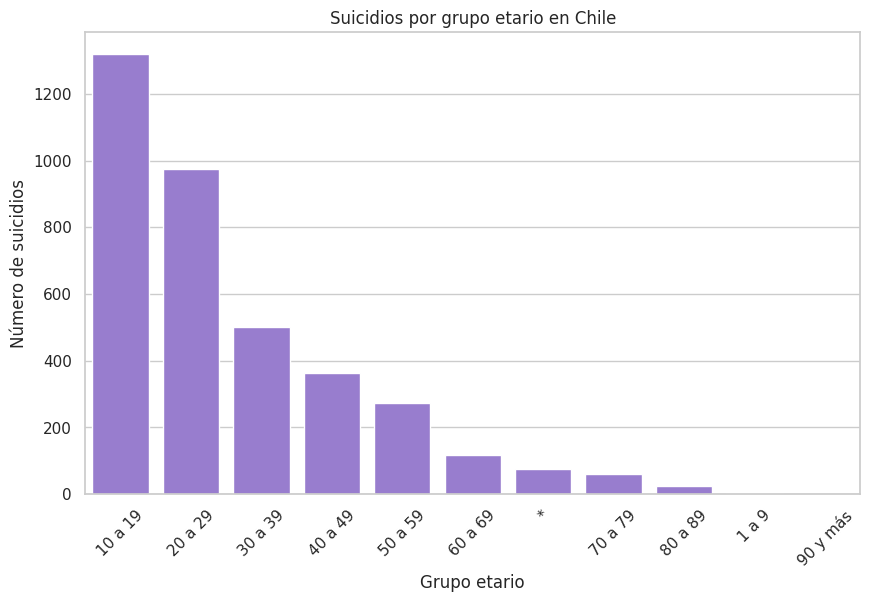

In [18]:
# Ordenar
edad_ordenado = edad.sort_values("cantidad", ascending=False)

# Gráfico
sns.barplot(data=edad_ordenado, x="grupo_edad", y="cantidad", color="#9370DB")
plt.title("Suicidios por grupo etario en Chile")
plt.ylabel("Número de suicidios")
plt.xlabel("Grupo etario")
plt.xticks(rotation=45)
plt.show()


## Distribución por región

La carga emocional, los recursos disponibles y las condiciones de vida varían según el territorio. Este gráfico muestra la distribución regional de los suicidios en Chile.


In [19]:
print(region.columns)


Index(['glosa_region_residencia', 'cantidad_suicidios'], dtype='object')


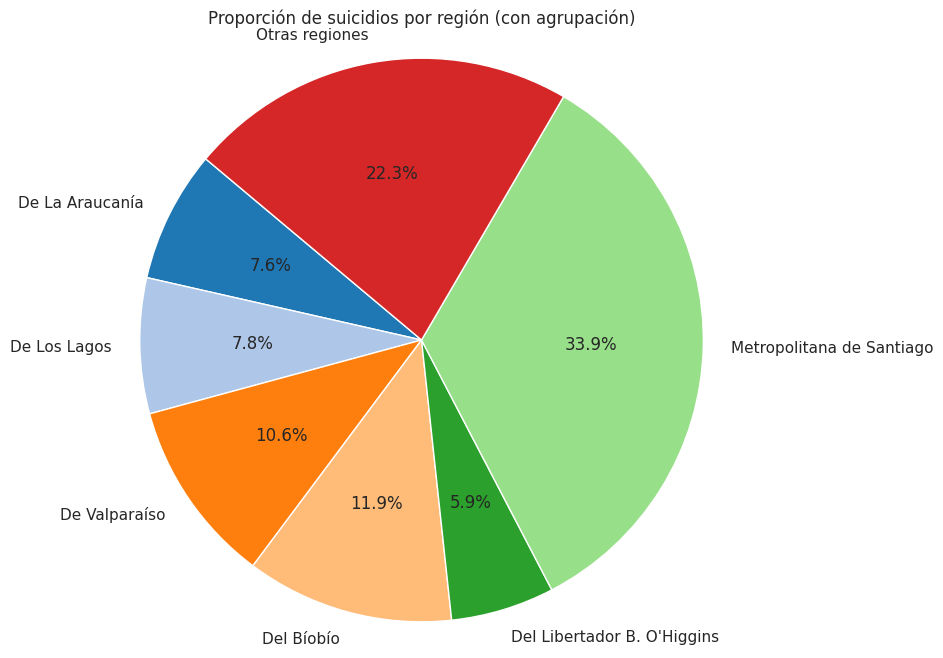

In [22]:
# Agrupar las regiones con menos de 4% en "Otras"
region['porcentaje'] = region['cantidad_suicidios'] / region['cantidad_suicidios'].sum()
region['region_simplificada'] = region['glosa_region_residencia'].where(region['porcentaje'] >= 0.04, 'Otras regiones')

# Agrupar nuevamente por categoría simplificada
region_simplificada = region.groupby('region_simplificada', as_index=False)['cantidad_suicidios'].sum()

# Crear gráfico
plt.figure(figsize=(8, 8))
plt.pie(region_simplificada['cantidad_suicidios'],
        labels=region_simplificada['region_simplificada'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab20.colors)
plt.title("Proporción de suicidios por región (con agrupación)")
plt.axis("equal")
plt.show()


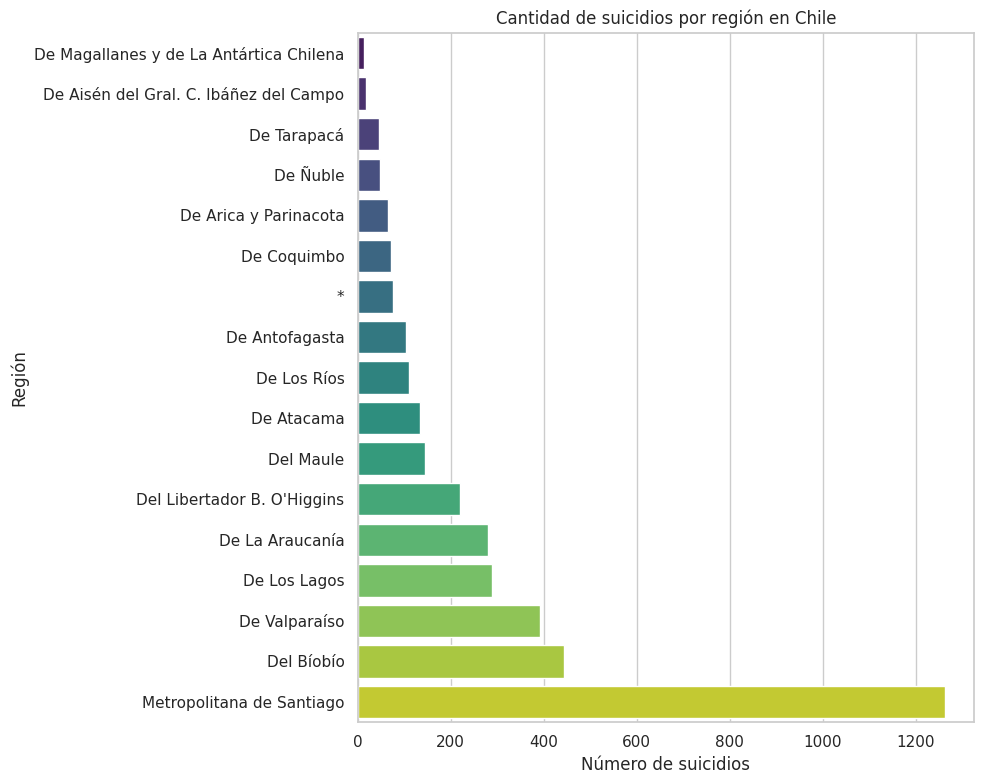

In [23]:
# Ordenar para mejorar visualización
region_ordenado = region.sort_values("cantidad_suicidios", ascending=True)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 8))
sns.barplot(data=region_ordenado,
            y="glosa_region_residencia",
            x="cantidad_suicidios",
            palette="viridis")
plt.title("Cantidad de suicidios por región en Chile")
plt.xlabel("Número de suicidios")
plt.ylabel("Región")
plt.tight_layout()
plt.show()


## Mapa de calor: suicidios por región, sexo y edad

Este gráfico cruza tres dimensiones: región, sexo y grupo etario. Permite ver, por ejemplo, qué combinaciones presentan mayores niveles de egresos por suicidio.


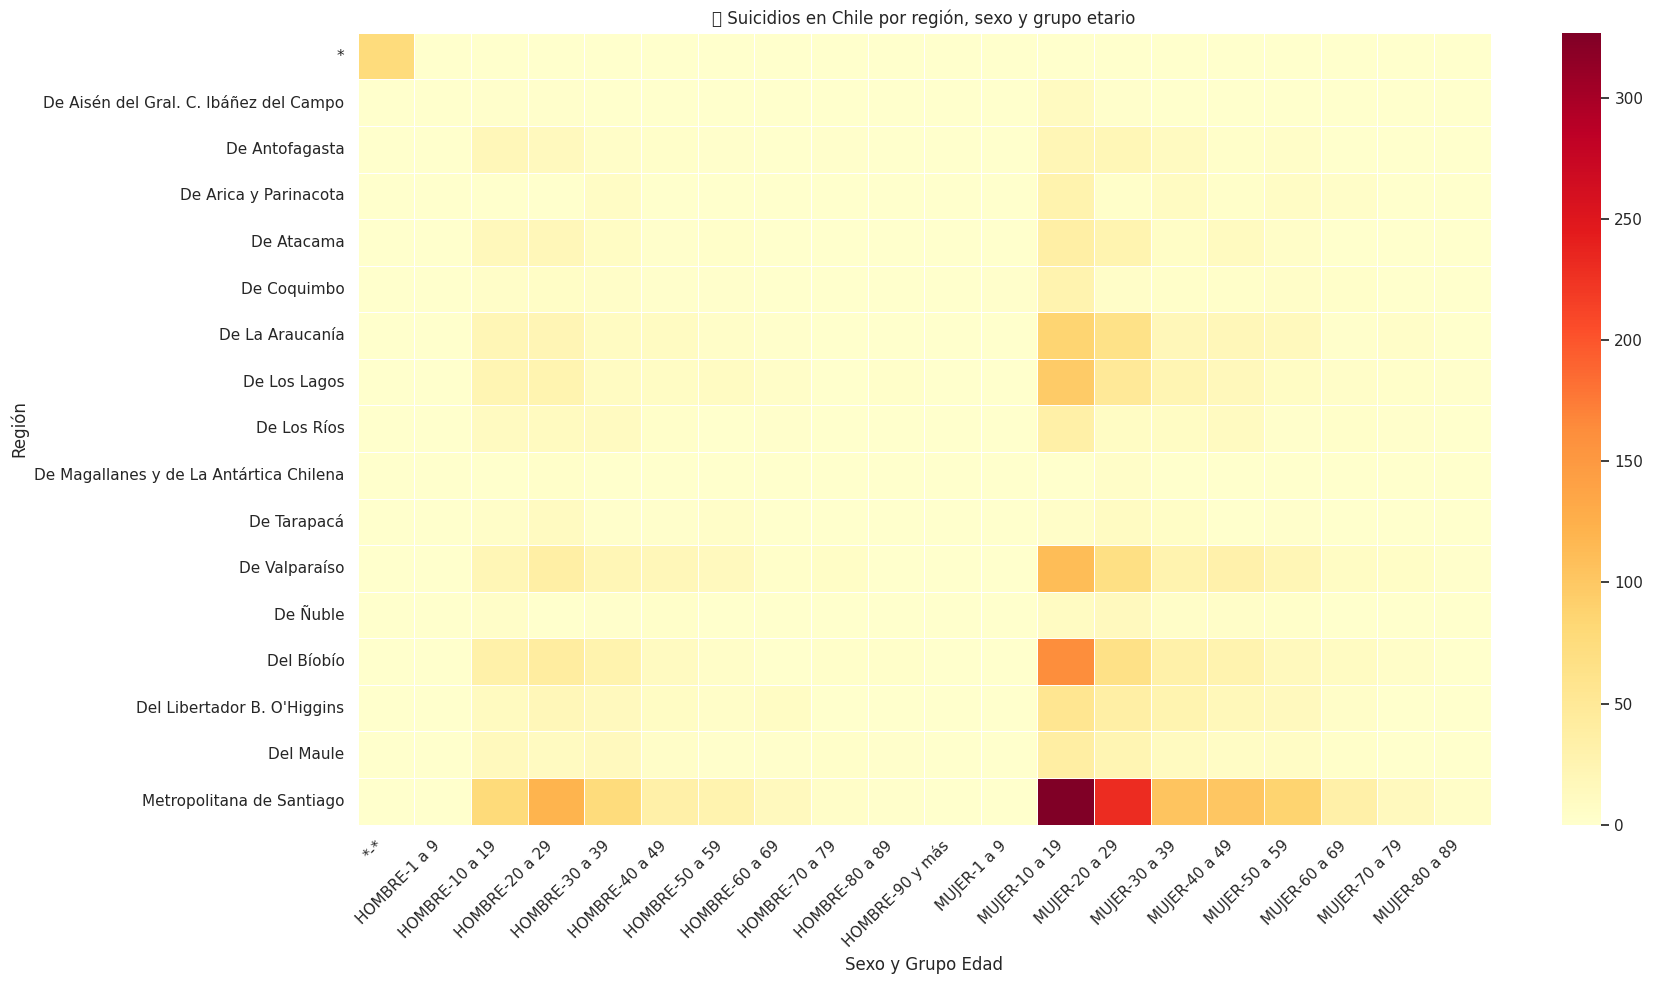

In [28]:
# Crear tabla dinámica
tabla = cruzado.pivot_table(
    index="glosa_region_residencia",
    columns=["sexo", "grupo_edad"],
    values="cantidad_suicidios",
    aggfunc="sum",
    fill_value=0
)

# Gráfico
plt.figure(figsize=(18, 10))
sns.heatmap(tabla, cmap="YlOrRd", linewidths=.5)
plt.title("🔍 Suicidios en Chile por región, sexo y grupo etario")
plt.xlabel("Sexo y Grupo Edad")
plt.ylabel("Región")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Conclusiones generales del análisis

- **Sexo y suicidio:**  
  Aunque existe una percepción común de que los hombres cometen más suicidios, los datos muestran que **las mujeres representan un mayor número de egresos hospitalarios asociados a intentos de suicidio**. Esta diferencia puede estar influenciada por factores como el acceso al sistema de salud, el tipo de método utilizado o la disposición a buscar ayuda médica.

- **Grupo etario más afectado:**  
  Los grupos de **10 a 19 años** y **20 a 29 años** concentran la mayor cantidad de casos. Esto sugiere una mayor vulnerabilidad en la población joven, lo que debería ser un foco prioritario en términos de prevención y apoyo psicosocial.

- **Distribución por región:**  
  La **Región Metropolitana de Santiago** concentra cerca del **34% de los casos**, seguida por **Biobío**, **Valparaíso** y **Los Lagos**. Sin embargo, regiones con menor población también registran cifras importantes, lo que sugiere la necesidad de analizar la tasa por cada 100.000 habitantes.

- **Cruce de región, sexo y edad:**  
  El mapa de calor mostró que **las mujeres jóvenes en la Región Metropolitana** son el grupo más afectado en términos de volumen total. Esto permite una mirada territorial y focalizada sobre dónde se requieren mayores esfuerzos en salud mental.

---

### Recomendaciones

-  **Priorizar intervenciones en salud mental** enfocadas en jóvenes, especialmente mujeres entre 10 y 29 años.

-  **Focalizar políticas públicas** en regiones con altas concentraciones de casos como la RM, Biobío y Valparaíso.

-  **Complementar con tasas ajustadas por población**, para evitar sesgos y tener una representación proporcional más precisa.

-  **Cruzar con otras bases de datos** (como defunciones por suicidio o indicadores socioeconómicos) para enriquecer el análisis.

-  **Fomentar campañas de prevención y educación emocional** en establecimientos educacionales y centros comunitarios, especialmente en zonas urbanas de alta carga.
